In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import datetime
import glob
import cv2
import sys
import os

In [20]:
sys.path.append('../')
from utils.train_utils import *

In [21]:
dates = ['24032019', '17042019', '01052019']
labels = ['zeev', 'or', 'ron', 'aviya', 'felix']

In [22]:
print(np.random.randint(0, 100, 10))

[87 99]


### prep data for training

In [4]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(dates, labels)

100%|██████████| 3000/3000 [00:00<00:00, 12748.48it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 30000/30000 [00:02<00:00, 12232.48it/s]
0it [00:00, ?it/s]
100%|██████████| 22000/22000 [00:01<00:00, 12565.49it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:01<00:00, 12023.84it/s]


### visual data

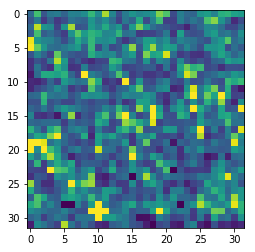

In [5]:
show_sample(x_train, 0)

In [6]:
print_unique_data(y_test)

[[   0 2500]
 [   1 3300]
 [   2 3300]
 [   3 3000]
 [   4 2100]]


In [7]:
prev_best_loaded = tf.keras.models.load_model('../models/5_lbls_relu_[32, 300, 100, 0.4]_2019518_1_23.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [8]:
prev_best_loaded.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               307500    
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 505       
Total para

### train model (due to previous notebooks result)

In [11]:
conf_list = [
    [32, 300, 100, 0.2],
    [32, 300, 100, 0.4],
    [32, 512, 256, 0.4],
    [32, 512, 256, 0.2],
    [32, 256, 128, 0.4],
    [32, 256, 128, 0.2],
]

In [12]:
run_custom_training(conf_list, labels, x_train, y_train, x_valid, y_valid, model_path_prefix='5_lbls_relu')

Train on 113600 samples, validate on 14200 samples
Epoch 1/50
113600/113600 [==============================] - 5s 42us/sample - loss: 1.1709 - acc: 0.5141 - val_loss: 1.4613 - val_acc: 0.4366
Epoch 2/50
113600/113600 [==============================] - 4s 36us/sample - loss: 0.9660 - acc: 0.6062 - val_loss: 1.4220 - val_acc: 0.4620
Epoch 3/50
113600/113600 [==============================] - 4s 36us/sample - loss: 0.8912 - acc: 0.6411 - val_loss: 1.2503 - val_acc: 0.5254
Epoch 4/50
113600/113600 [==============================] - 4s 36us/sample - loss: 0.8360 - acc: 0.6670 - val_loss: 1.6371 - val_acc: 0.5299
Epoch 5/50
113600/113600 [==============================] - 4s 36us/sample - loss: 0.7857 - acc: 0.6889 - val_loss: 1.4620 - val_acc: 0.5420
Epoch 6/50
113600/113600 [==============================] - 4s 35us/sample - loss: 0.7393 - acc: 0.7101 - val_loss: 2.7696 - val_acc: 0.4480
Epoch 7/50
113600/113600 [==============================] - 4s 37us/sample - loss: 0.7036 - acc: 0.7272

Epoch 14/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5811 - acc: 0.7768 - val_loss: 1.4006 - val_acc: 0.6039
Epoch 15/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5605 - acc: 0.7857 - val_loss: 1.0340 - val_acc: 0.6643
Epoch 16/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5503 - acc: 0.7900 - val_loss: 1.9626 - val_acc: 0.5437
Epoch 17/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5351 - acc: 0.7955 - val_loss: 2.0941 - val_acc: 0.5556
Epoch 18/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5230 - acc: 0.8010 - val_loss: 2.2754 - val_acc: 0.5459
Epoch 19/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.5190 - acc: 0.8028 - val_loss: 1.4486 - val_acc: 0.5985
Epoch 20/50
113600/113600 [==============================] - 6s 57us/sample - loss: 0.5073 - acc: 0.8079 - val_loss: 2.5793 - val_acc: 0.5207
Epoch 

Epoch 21/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.3014 - acc: 0.8876 - val_loss: 1.6767 - val_acc: 0.6346
Epoch 22/50
113600/113600 [==============================] - 6s 55us/sample - loss: 0.2915 - acc: 0.8915 - val_loss: 1.4056 - val_acc: 0.6703
Epoch 23/50
113600/113600 [==============================] - 6s 55us/sample - loss: 0.2846 - acc: 0.8945 - val_loss: 1.5678 - val_acc: 0.6718
Epoch 24/50
113600/113600 [==============================] - 6s 55us/sample - loss: 0.2763 - acc: 0.8975 - val_loss: 1.6004 - val_acc: 0.6282
Epoch 25/50
113600/113600 [==============================] - 6s 55us/sample - loss: 0.2702 - acc: 0.8997 - val_loss: 1.4101 - val_acc: 0.6772
Epoch 26/50
113600/113600 [==============================] - 6s 55us/sample - loss: 0.2652 - acc: 0.9014 - val_loss: 1.1116 - val_acc: 0.7165
Epoch 27/50
113600/113600 [==============================] - 6s 56us/sample - loss: 0.2537 - acc: 0.9059 - val_loss: 1.5875 - val_acc: 0.6877
Epoch 

Epoch 28/50
113600/113600 [==============================] - 3s 30us/sample - loss: 0.5788 - acc: 0.7741 - val_loss: 0.9143 - val_acc: 0.6905
Epoch 29/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.5697 - acc: 0.7779 - val_loss: 1.1024 - val_acc: 0.6641
Epoch 30/50
113600/113600 [==============================] - 3s 28us/sample - loss: 0.5645 - acc: 0.7812 - val_loss: 1.1601 - val_acc: 0.6539
Epoch 31/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.5604 - acc: 0.7826 - val_loss: 1.1430 - val_acc: 0.6499
Epoch 32/50
113600/113600 [==============================] - 3s 28us/sample - loss: 0.5549 - acc: 0.7846 - val_loss: 1.1151 - val_acc: 0.6435
Epoch 33/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.5521 - acc: 0.7855 - val_loss: 1.0734 - val_acc: 0.6609
Epoch 34/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.5430 - acc: 0.7895 - val_loss: 1.1709 - val_acc: 0.6019
Epoch 

Epoch 35/50
113600/113600 [==============================] - 3s 28us/sample - loss: 0.3149 - acc: 0.8805 - val_loss: 1.3828 - val_acc: 0.6665
Epoch 36/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.3165 - acc: 0.8819 - val_loss: 1.3243 - val_acc: 0.6506
Epoch 37/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.3139 - acc: 0.8812 - val_loss: 1.5168 - val_acc: 0.6551
Epoch 38/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.3069 - acc: 0.8831 - val_loss: 1.2681 - val_acc: 0.6773
Epoch 39/50
113600/113600 [==============================] - 3s 29us/sample - loss: 0.3035 - acc: 0.8858 - val_loss: 1.3974 - val_acc: 0.6835
Epoch 40/50
113600/113600 [==============================] - 4s 32us/sample - loss: 0.3008 - acc: 0.8871 - val_loss: 1.3470 - val_acc: 0.6708
Epoch 41/50
113600/113600 [==============================] - 3s 30us/sample - loss: 0.2939 - acc: 0.8891 - val_loss: 1.2034 - val_acc: 0.6987
Epoch 

### 08 July 2019:
1. chosen model path: '../models/5_lbls_relu_[32, 512, 256, 0.2]_201978_11_6.h5'
2. tensorboard log:   'notebooks/logs/[32, 512, 256, 0.2]_201978_11_6/'